In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_excel(r'C:\Users\Gaming PC\Desktop\bepec\churn/CHURNDATA.xlsx')

In [3]:
df.head(5)

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [5]:
df.isnull().sum()

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

In [6]:
df['CUS_Gender'].value_counts()

MALE      741
FEMALE    506
Name: CUS_Gender, dtype: int64

In [7]:
df[df['CUS_Month_Income'].isnull()]

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
85,XXXXXX,Apr 3 1957 12:00AM,62,NaN,FEMALE,SINGLE,1996-05-07,23,21,17,...,0.00,0.00,82043.30,47,0.00,0,47,2223,LOW,ACTIVE
99,XXXXXX,Dec 31 1953 12:00AM,66,NaN,FEMALE,MARRIED,1998-01-20,21,11,25,...,24294.55,26893.50,101900.00,58,75482.60,32,90,2223,LOW,ACTIVE
184,XXXXXX,Jan 1 1900 12:00AM,119,NaN,NaN,MARRIED,1998-01-20,21,4,4,...,2000.00,0.00,18649.30,9,2000.00,1,10,2223,LOW,CHURN
316,XXXXXX,Jan 2 1975 12:00AM,44,NaN,MALE,SINGLE,2005-05-26,14,0,2,...,0.00,0.00,1000.00,2,0.00,0,2,2222,MIDLE,CHURN
368,XXXXXX,May 7 1976 12:00AM,43,NaN,MALE,SINGLE,2005-06-07,14,22,56,...,125400.78,41800.26,229406.14,101,250801.56,12,113,2222,MIDLE,ACTIVE
400,XXXXXX,Jul 15 1963 12:00AM,56,NaN,MALE,SINGLE,1995-03-17,24,26,20,...,0.00,0.00,297687.54,46,0.00,0,46,2222,MIDLE,CHURN
427,XXXXXX,Dec 7 1963 12:00AM,56,NaN,MALE,SINGLE,1991-11-09,28,9,14,...,18550.72,0.00,26745.00,25,18550.72,1,26,2223,LOW,ACTIVE
857,XXXXXX,Feb 2 1961 12:00AM,58,NaN,FEMALE,SINGLE,1997-01-13,22,37,68,...,80679.78,180922.70,276279.95,152,261602.48,8,160,2223,LOW,ACTIVE
938,XXXXXX,Mar 13 1976 12:00AM,43,NaN,FEMALE,MARRIED,1996-07-25,23,6,6,...,0.00,2900.00,9751.20,21,2900.00,1,22,2222,MIDLE,ACTIVE
996,XXXXXX,Jan 1 1900 12:00AM,119,NaN,NaN,SINGLE,1998-01-07,21,27,0,...,0.00,0.00,43318.00,27,39250.86,5,32,2233,LOW,CHURN


In [8]:
data=df.copy()

In [9]:
data.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [10]:
data['CUS_Gender'].fillna('MALE',inplace=True)

In [11]:
data['CUS_Month_Income'].fillna(data['CUS_Month_Income'].mean(),inplace=True)

In [12]:
data.isnull().sum()

CIF                                   0
CUS_DOB                               0
AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
CUS_Customer_Since                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0


In [13]:
sta_val=data['Status'].value_counts().values

In [14]:
sta_index=data['Status'].value_counts().index

([<matplotlib.patches.Wedge at 0x1c2e329da60>,
 [Text(-0.9255148230770242, 0.5944933239866574, 'ACTIVE'),
  Text(0.925514795246782, -0.5944933673131327, 'CHURN')],
 [Text(-0.5048262671329222, 0.324269085810904, '81.83%'),
  Text(0.5048262519527902, -0.3242691094435269, '18.17%')])

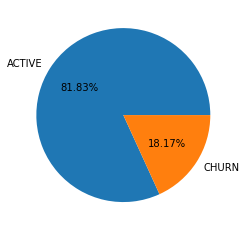

In [15]:
plt.pie(sta_val,labels=sta_index,autopct='%1.2f%%')

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


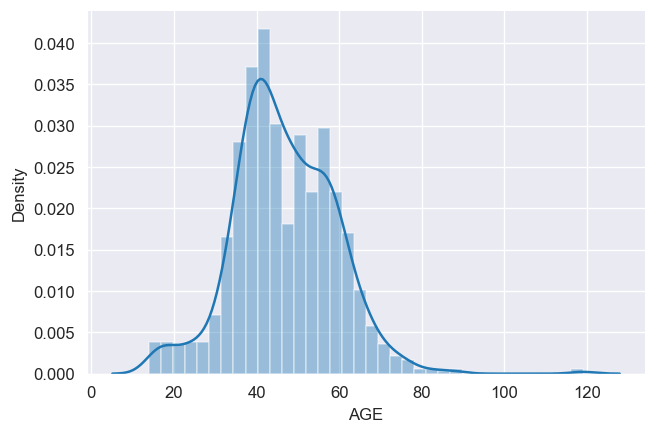

In [16]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 120
sns.distplot(data['AGE'])
sns.despine()

<AxesSubplot:xlabel='CUS_Gender', ylabel='count'>

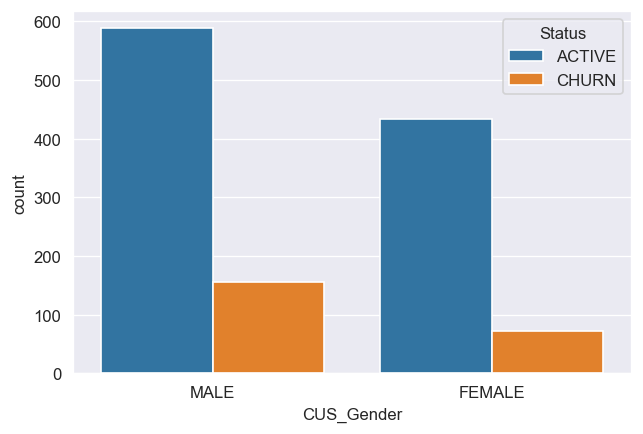

In [17]:
sns.countplot(hue='Status',x='CUS_Gender',data=data)

<AxesSubplot:xlabel='CUS_Marital_Status', ylabel='count'>

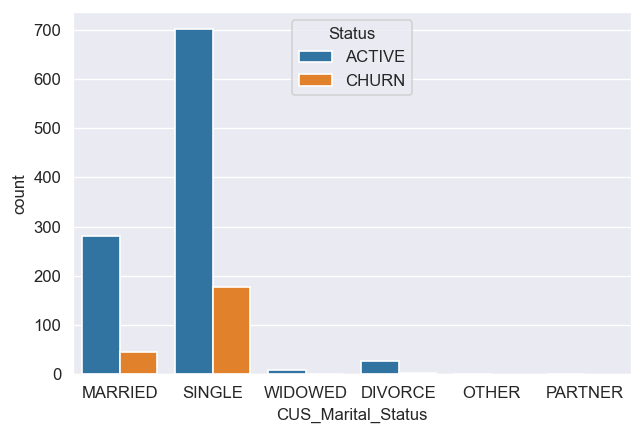

In [18]:
sns.countplot(hue='Status',x='CUS_Marital_Status',data=data)

<AxesSubplot:xlabel='TAR_Desc', ylabel='count'>

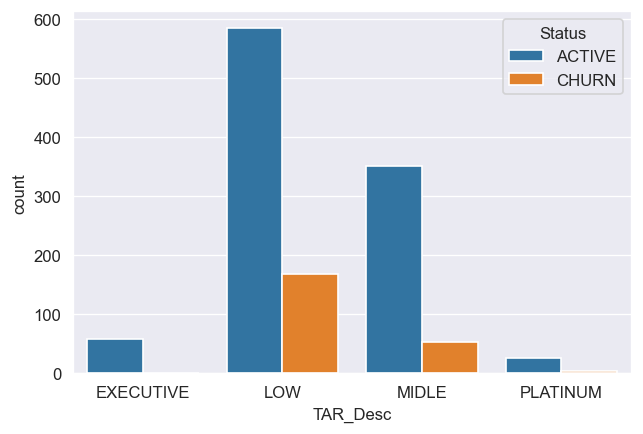

In [19]:
sns.countplot(hue='Status',x='TAR_Desc',data=data)

<AxesSubplot:xlabel='TAR_Desc', ylabel='count'>

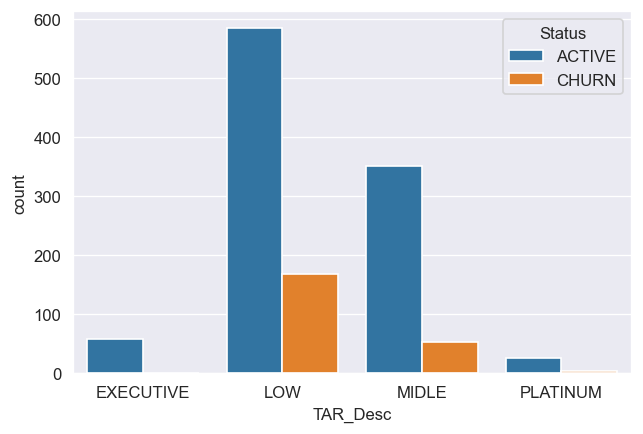

In [20]:
sns.countplot(data=data, x="TAR_Desc", hue="Status")

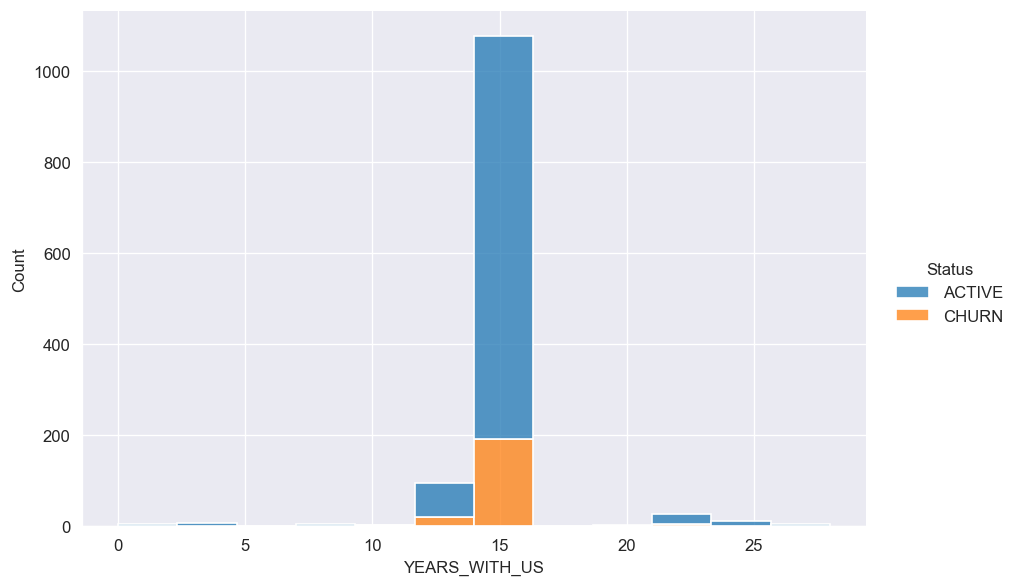

In [21]:
sns.displot(data=data,x='YEARS_WITH_US',aspect=1.5,hue='Status',multiple='stack')

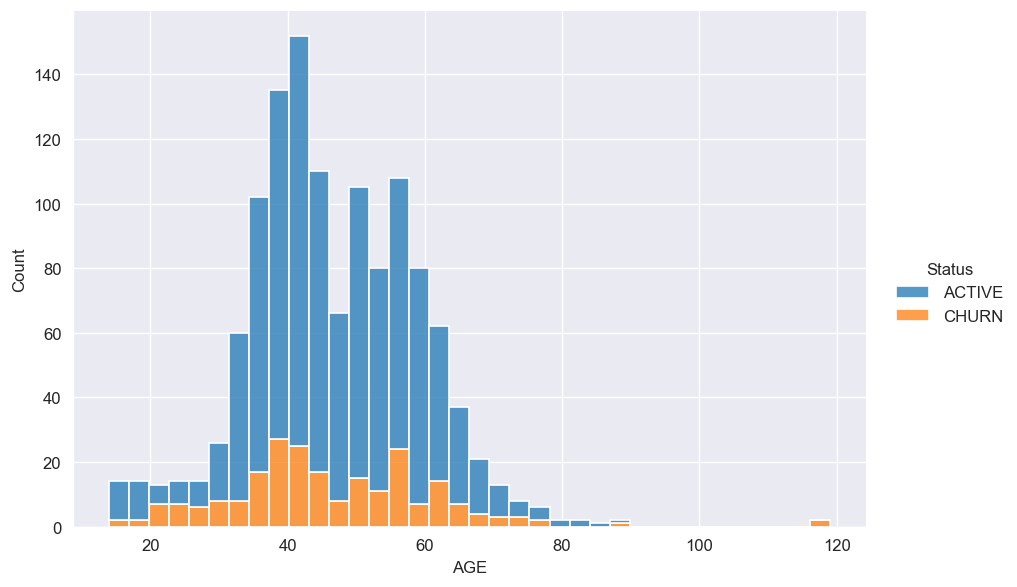

In [22]:
sns.displot(data=data,x='AGE',aspect=1.5,hue='Status',multiple='stack')

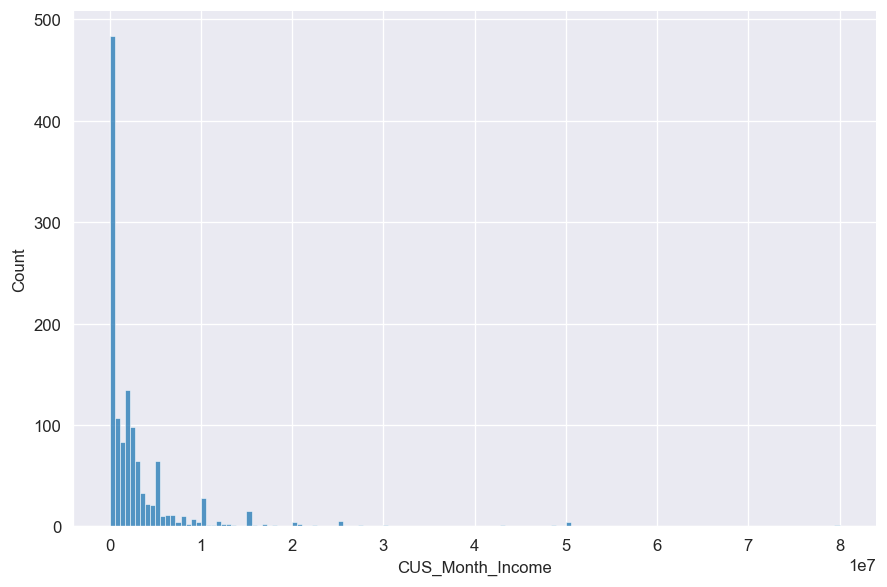

In [23]:
sns.displot(data=data,x='CUS_Month_Income',aspect=1.5)

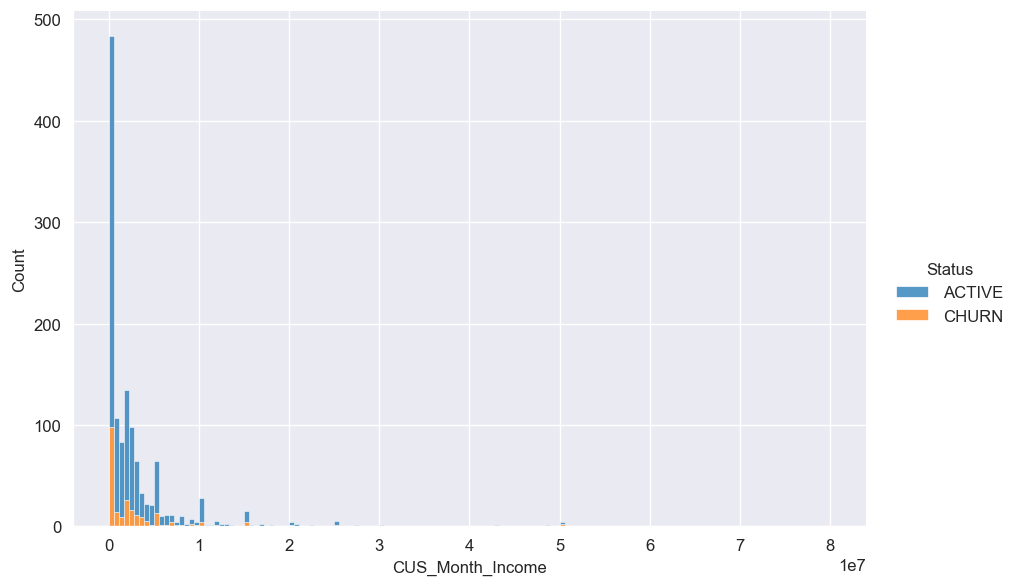

In [24]:
sns.displot(data=data,x='CUS_Month_Income',aspect=1.5,hue='Status',multiple='stack')

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


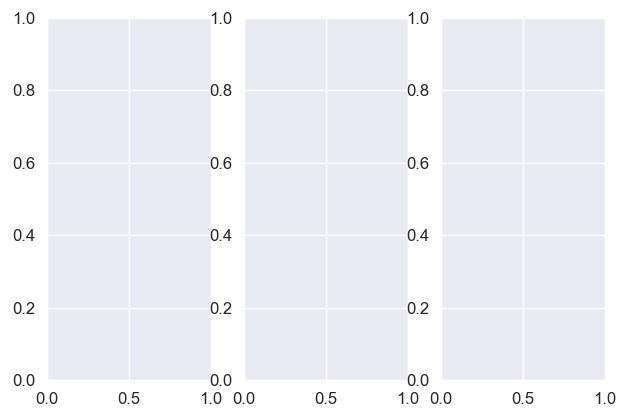

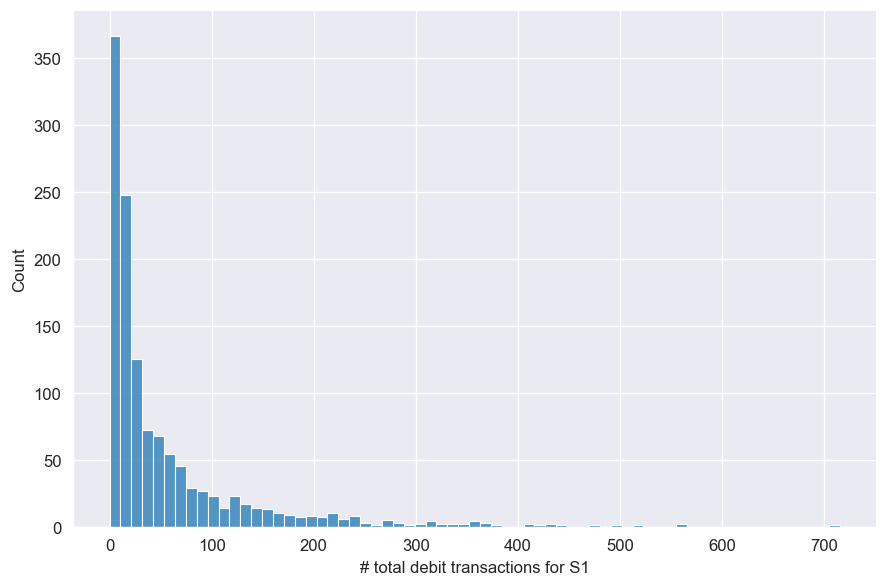

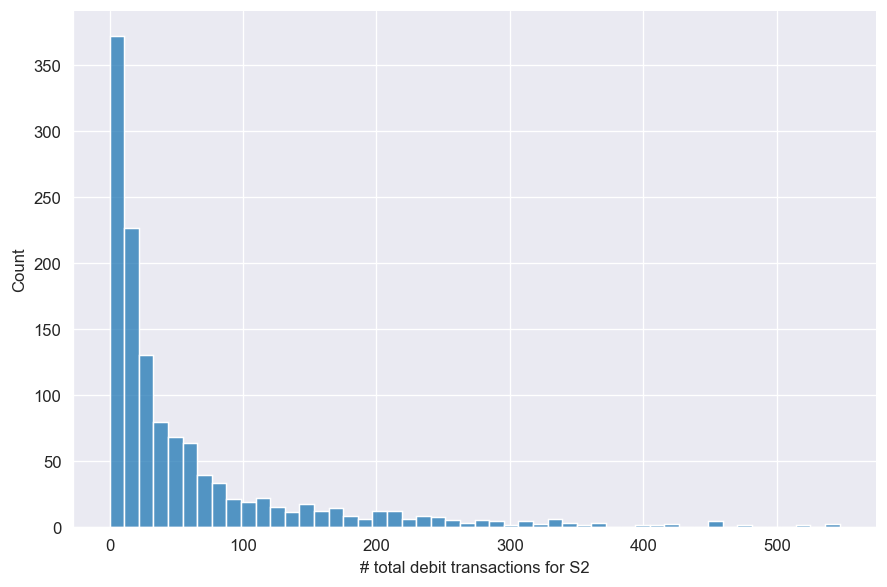

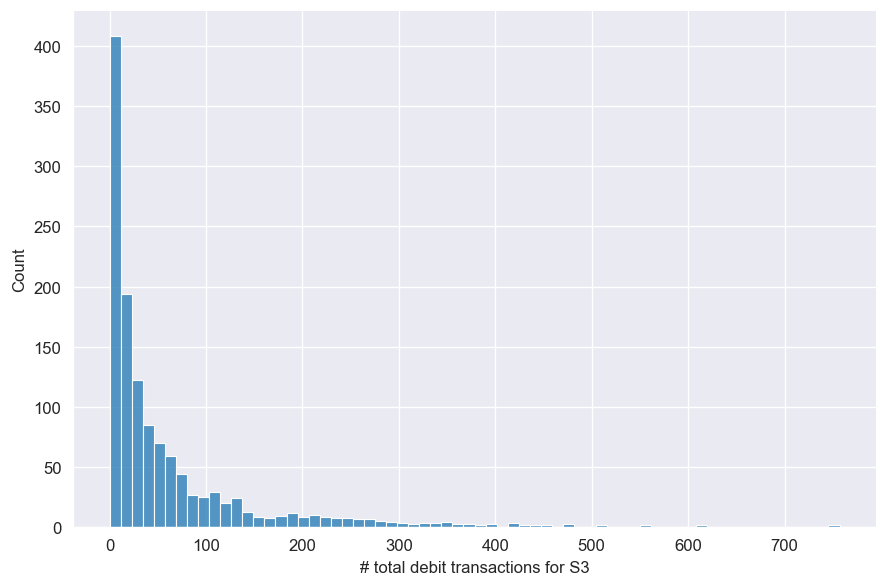

In [25]:
fig, axs = plt.subplots(ncols=3)
sns.displot(data=data,x='# total debit transactions for S1',aspect=1.5,ax=axs[0])
sns.displot(data=data,x='# total debit transactions for S2',aspect=1.5,ax=axs[1])
sns.displot(data=data,x='# total debit transactions for S3',aspect=1.5,ax=axs[2])

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


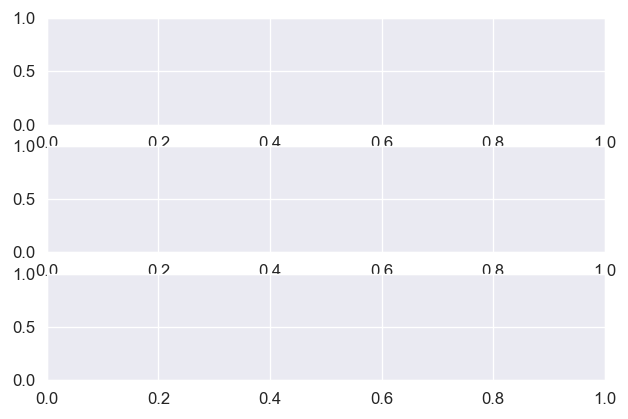

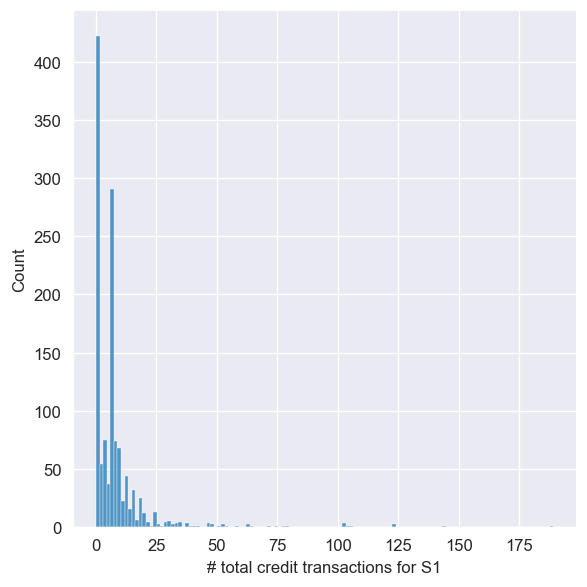

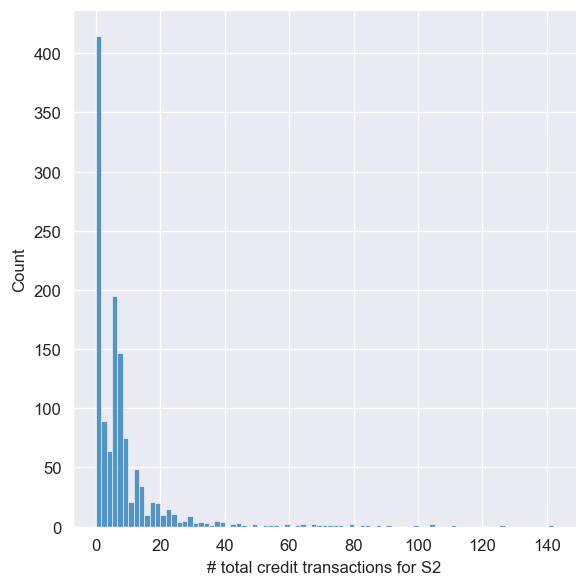

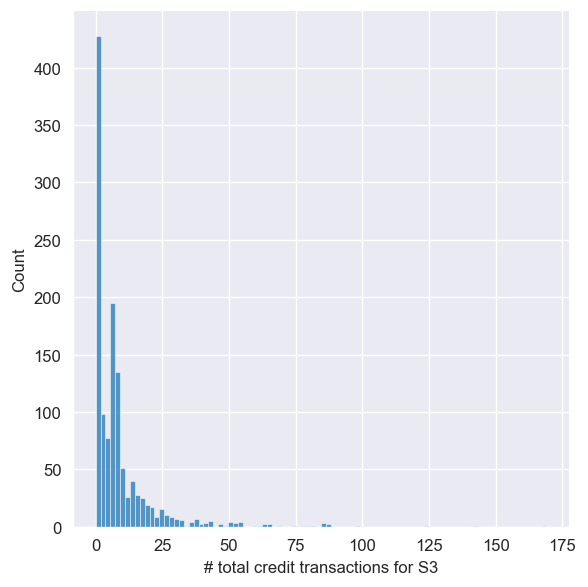

In [26]:
#fig, axs = plt.subplots(ncols=3)
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
sns.displot(data=data,x='# total credit transactions for S1',ax=ax1)
sns.displot(data=data,x='# total credit transactions for S2',ax=ax2)
sns.displot(data=data,x='# total credit transactions for S3',ax=ax3)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1249 non-null   float64       
 4   CUS_Gender                          1249 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

<AxesSubplot:xlabel='CUS_Target', ylabel='count'>

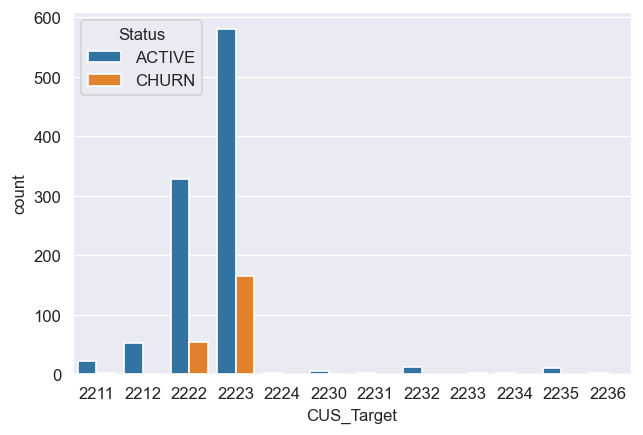

In [28]:
sns.countplot(x='CUS_Target',hue='Status',data=data)

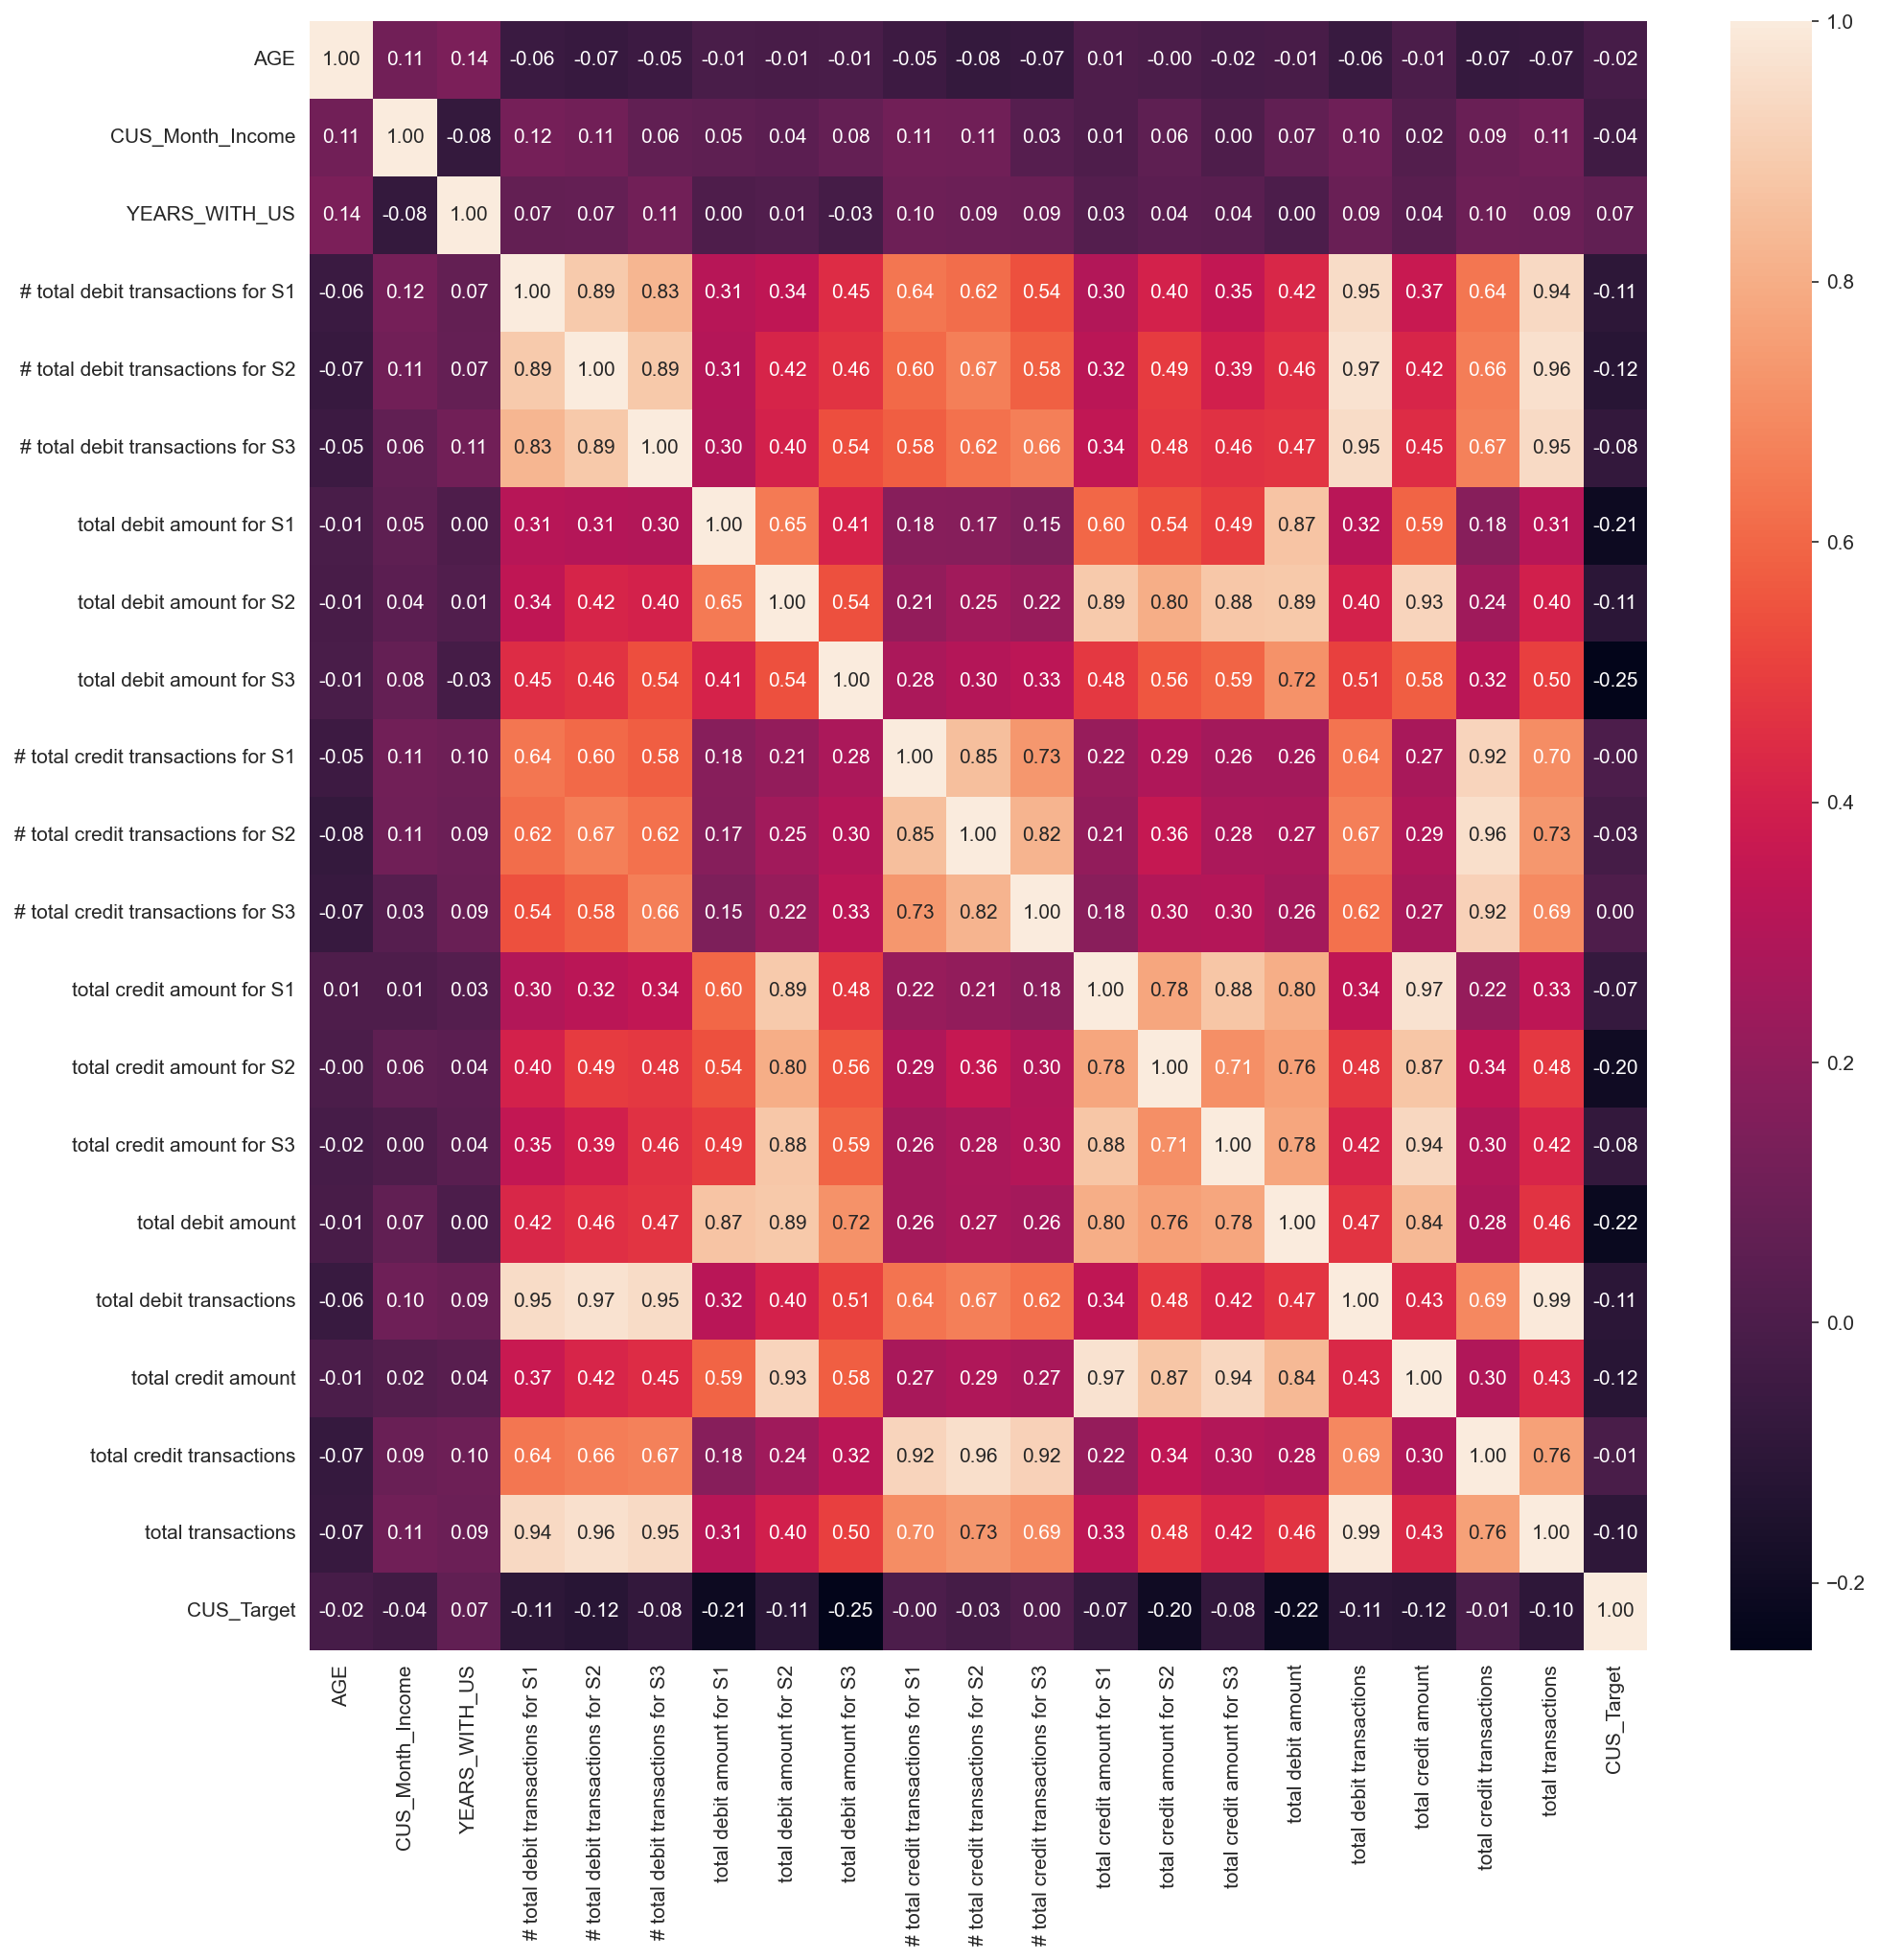

In [29]:
plt.figure(figsize=(15,15), dpi=150)
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


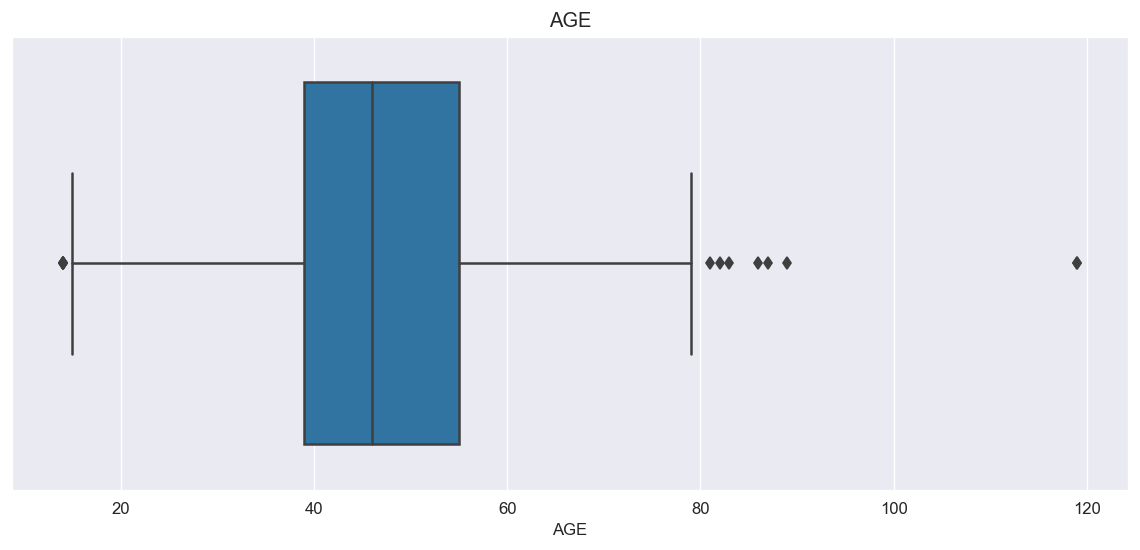

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


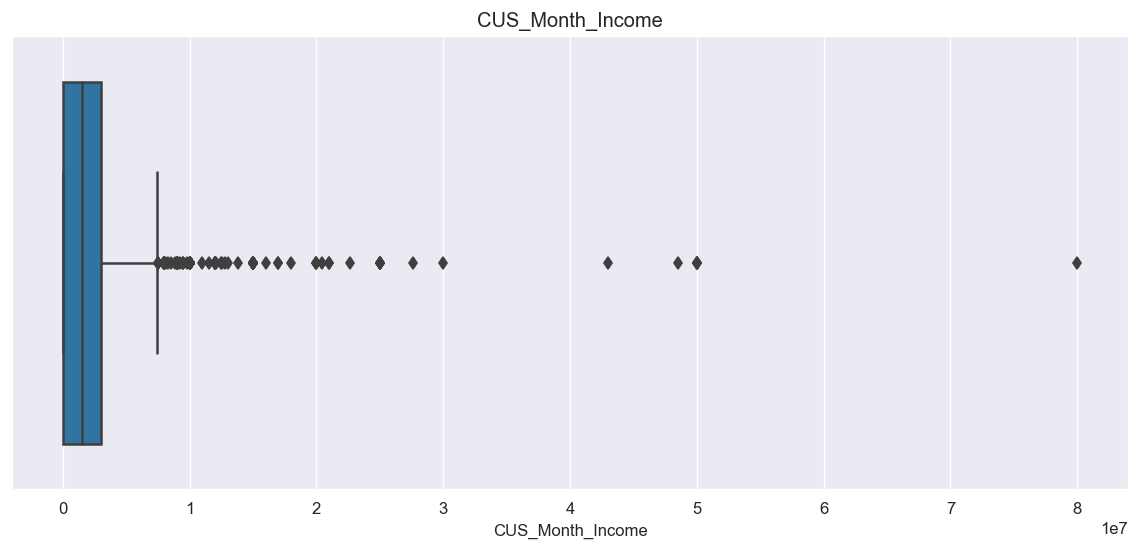

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


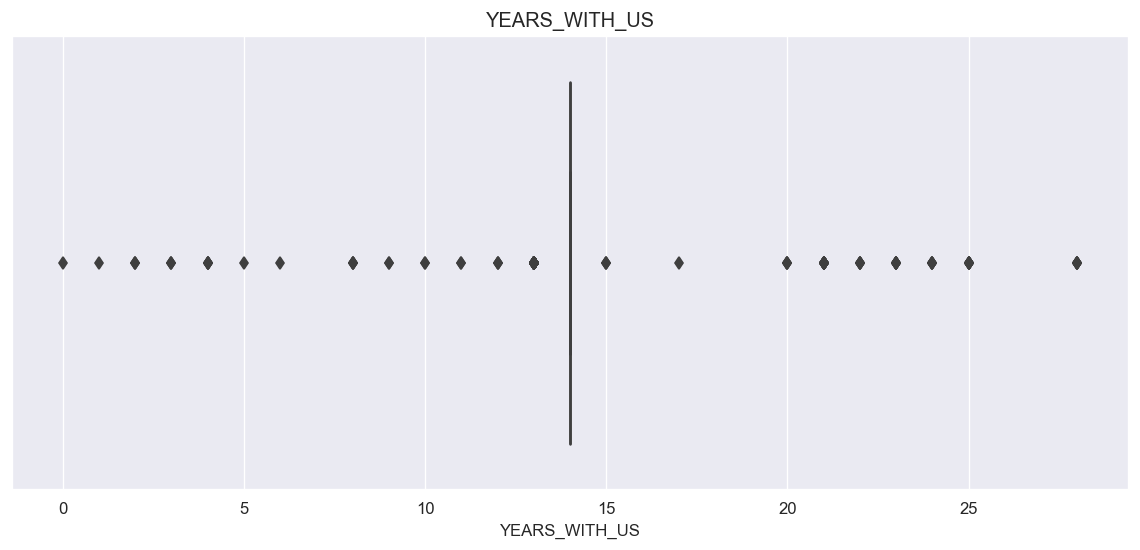

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


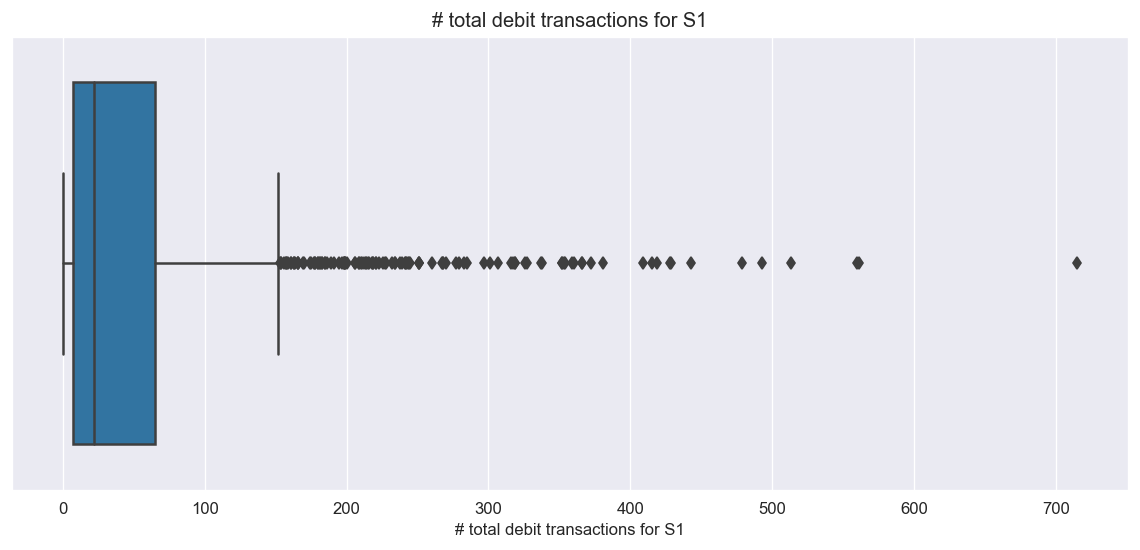

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


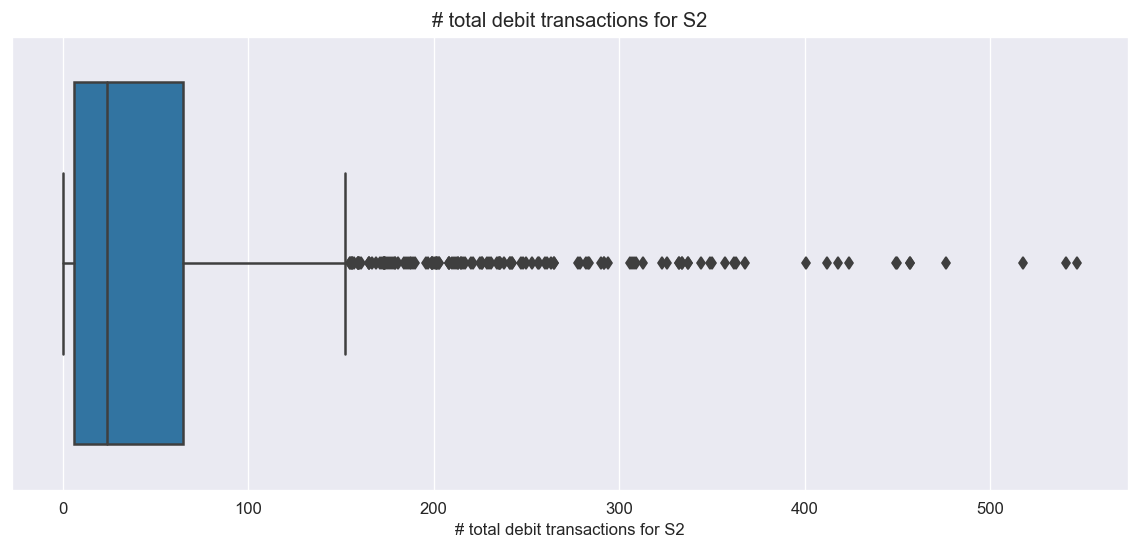

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


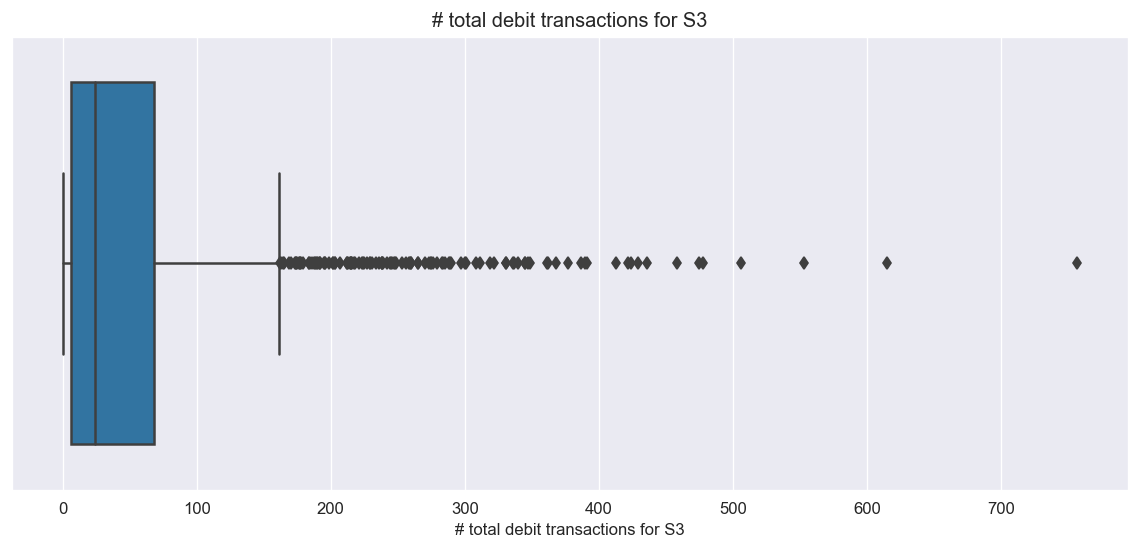

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


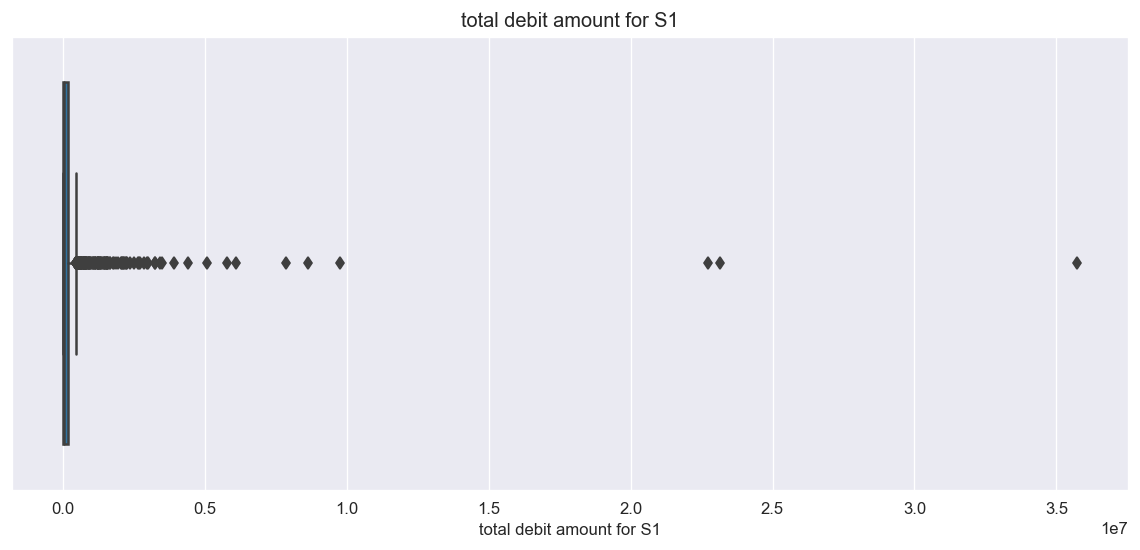

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


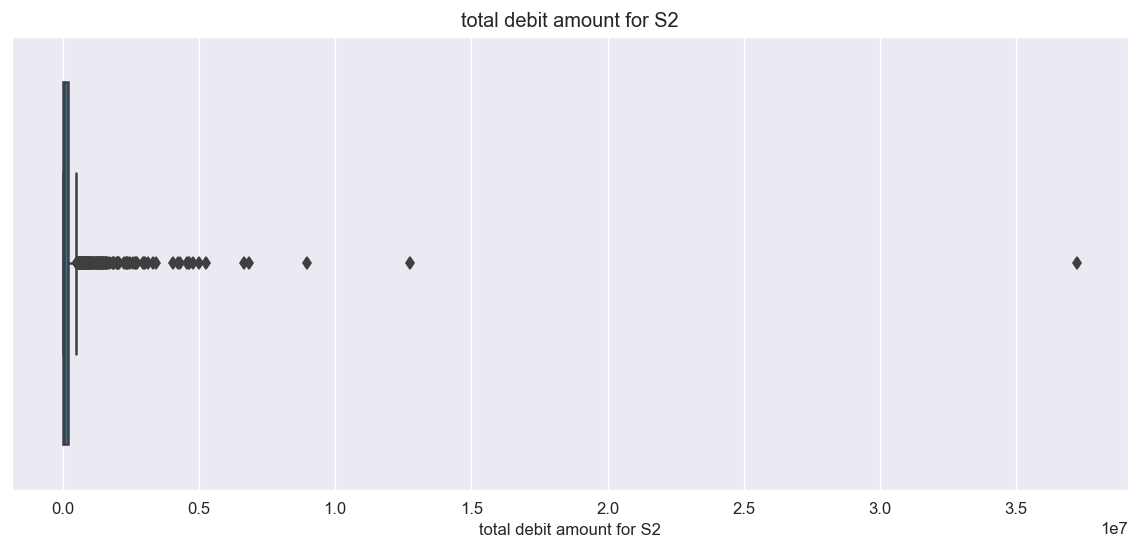

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


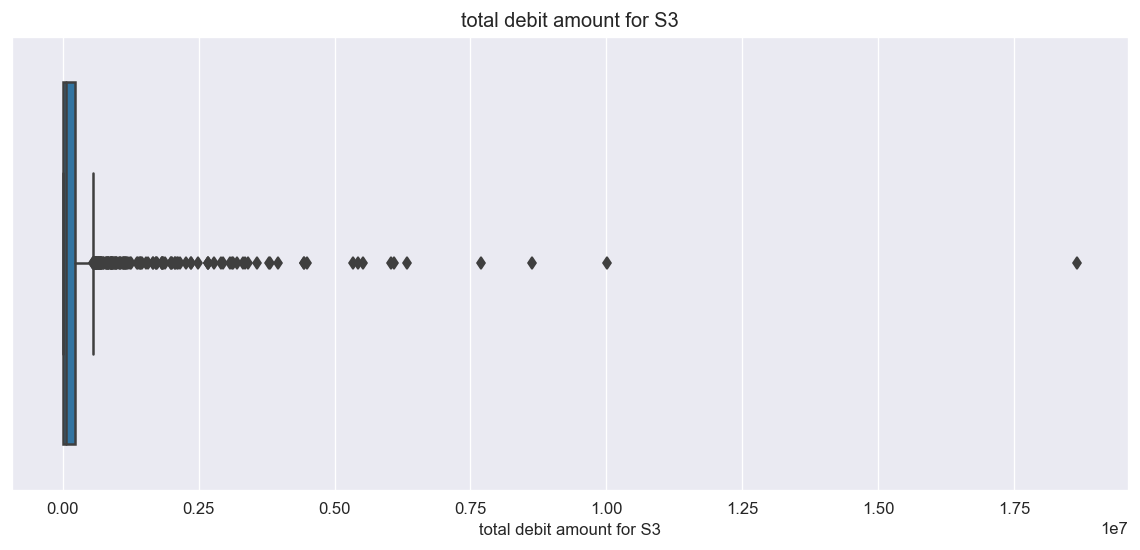

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


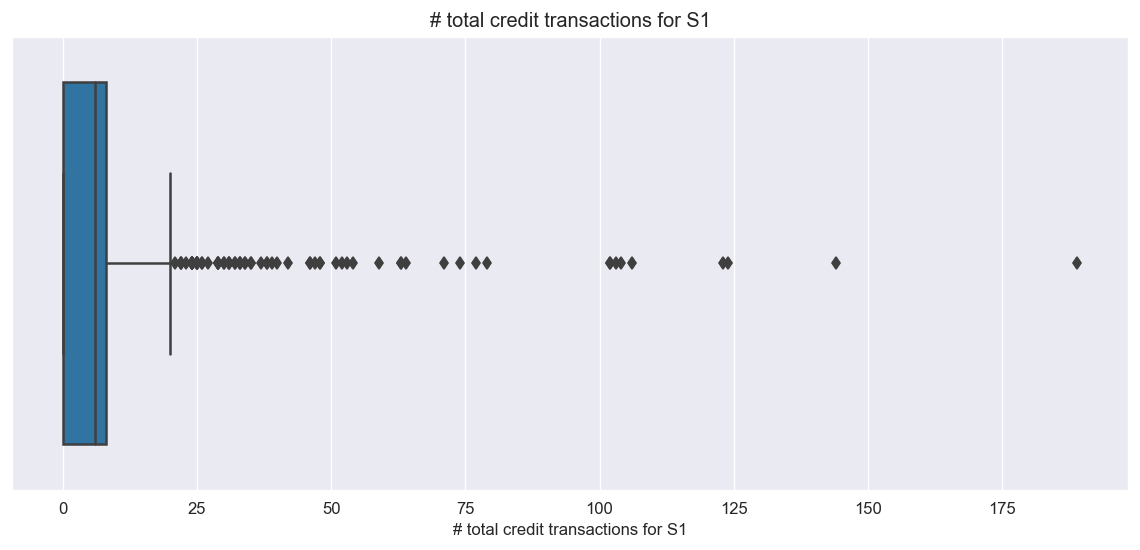

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


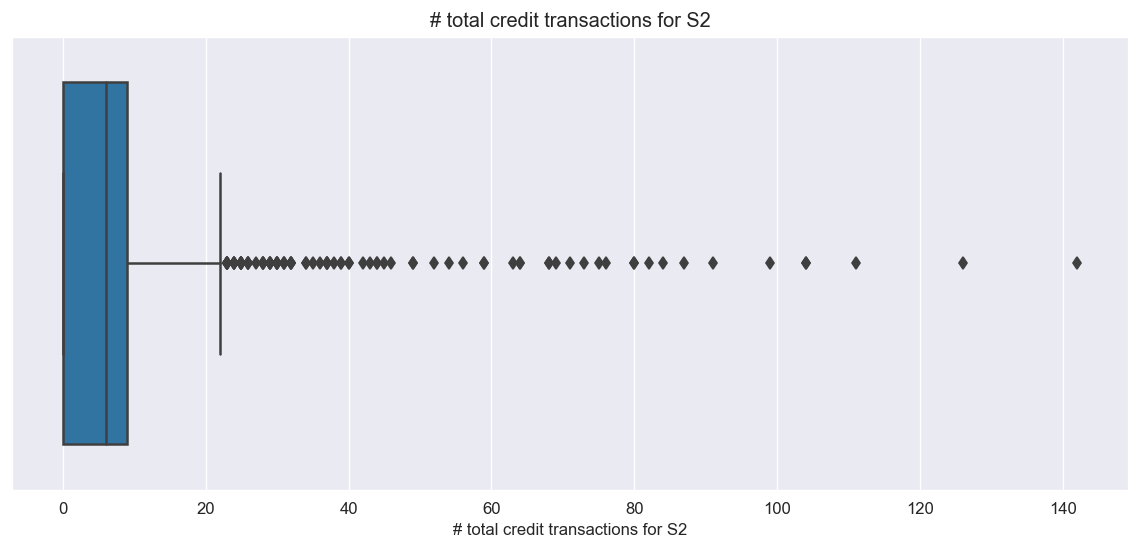

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


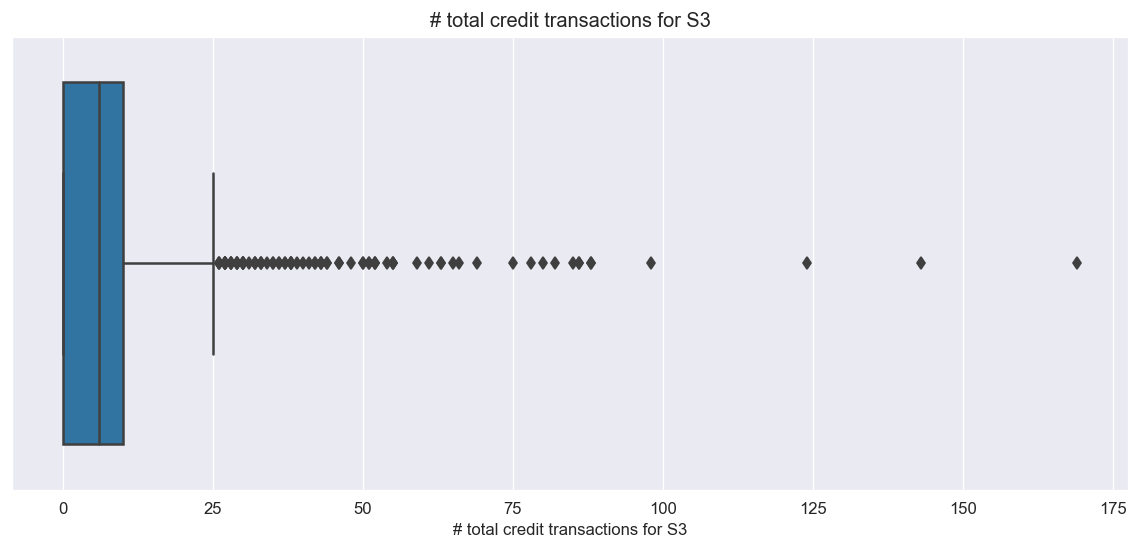

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


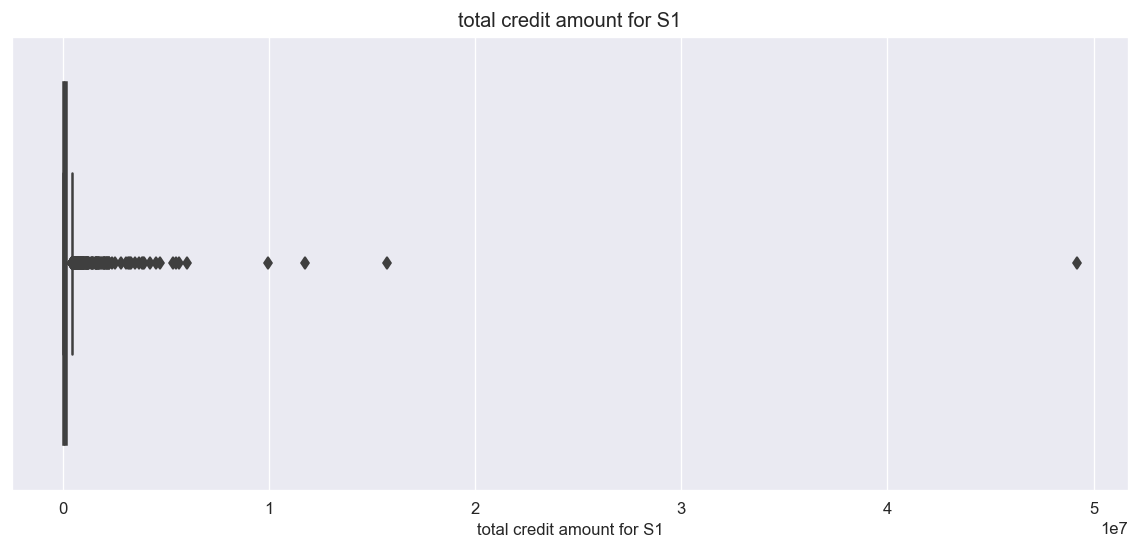

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


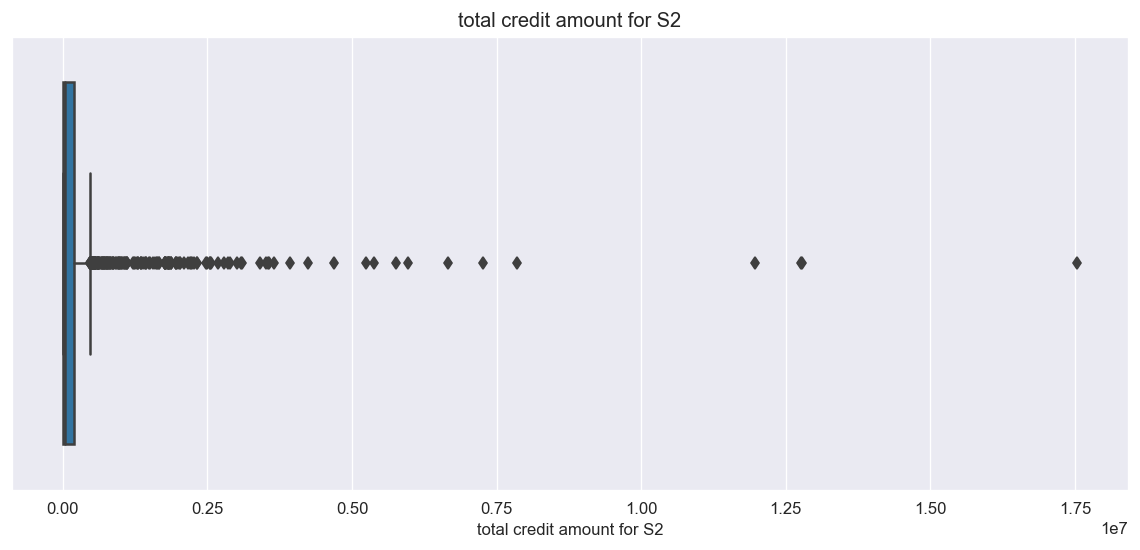

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


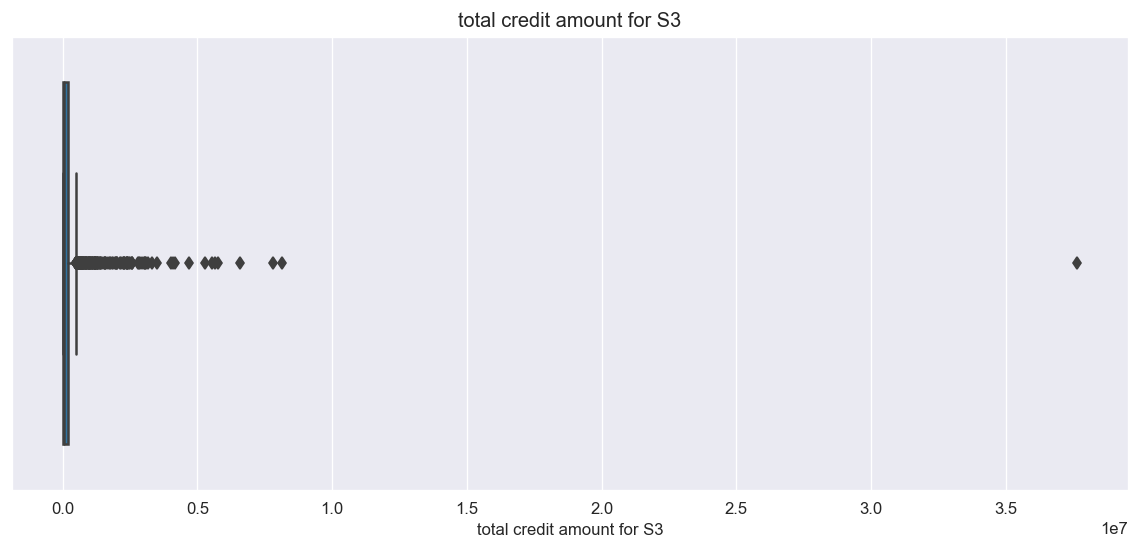

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


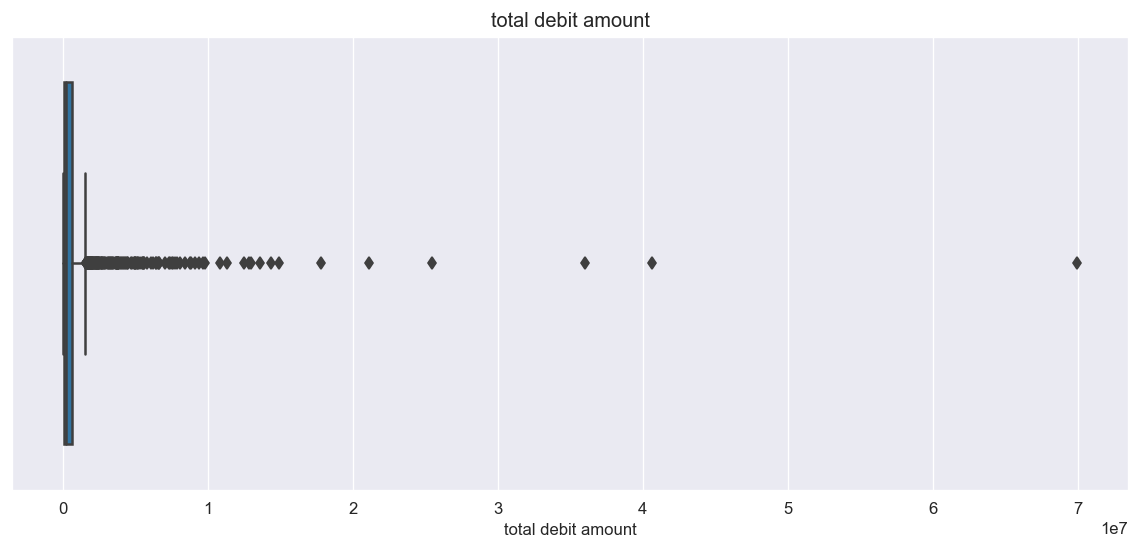

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


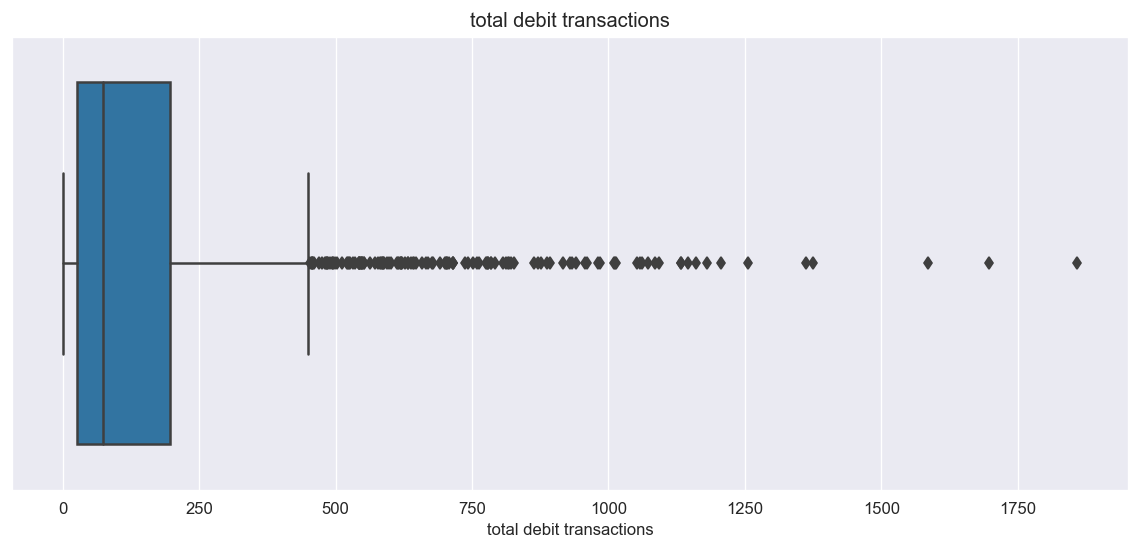

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


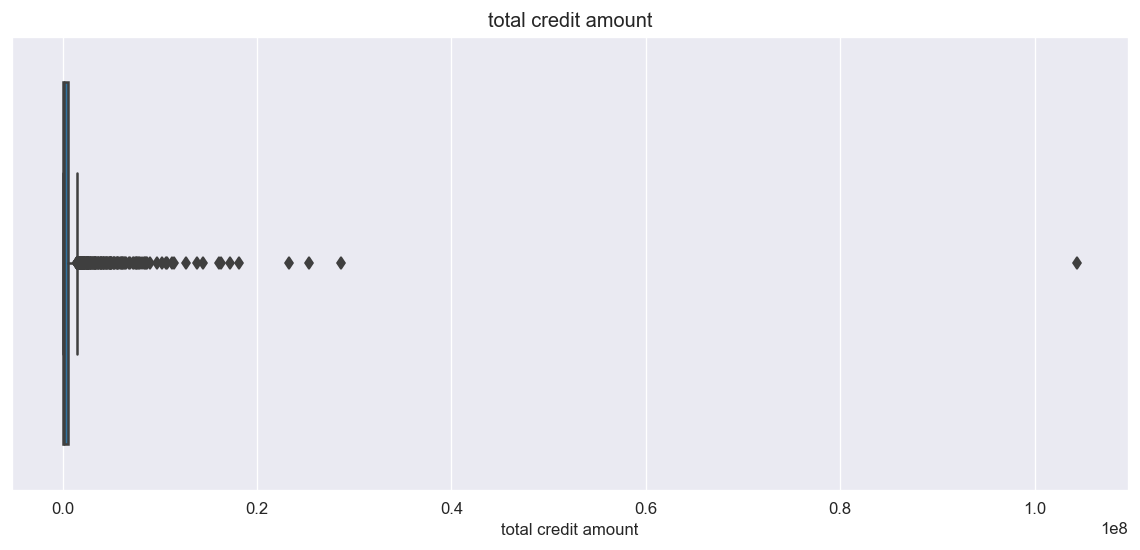

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


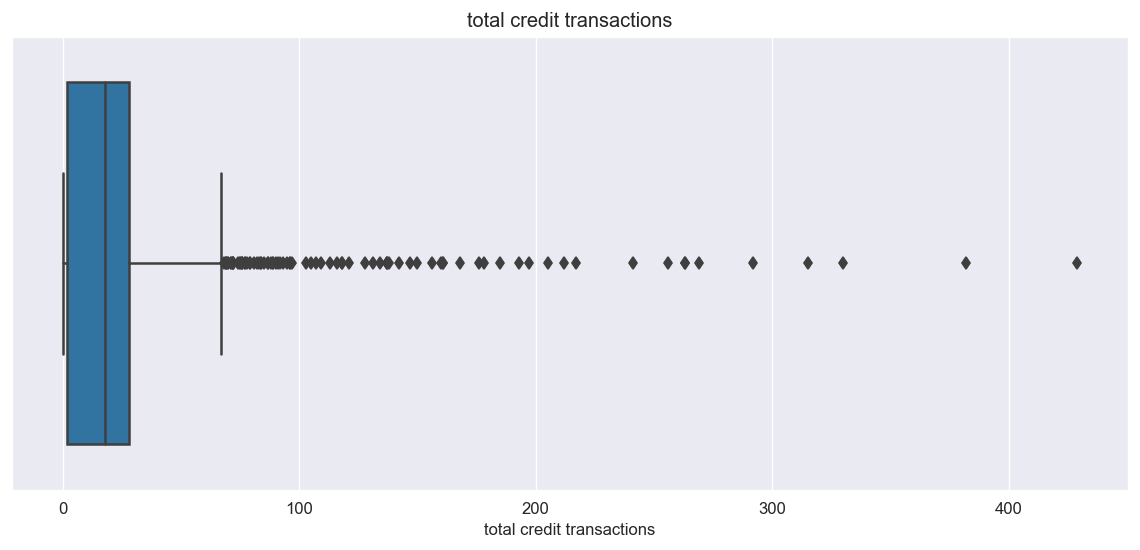

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


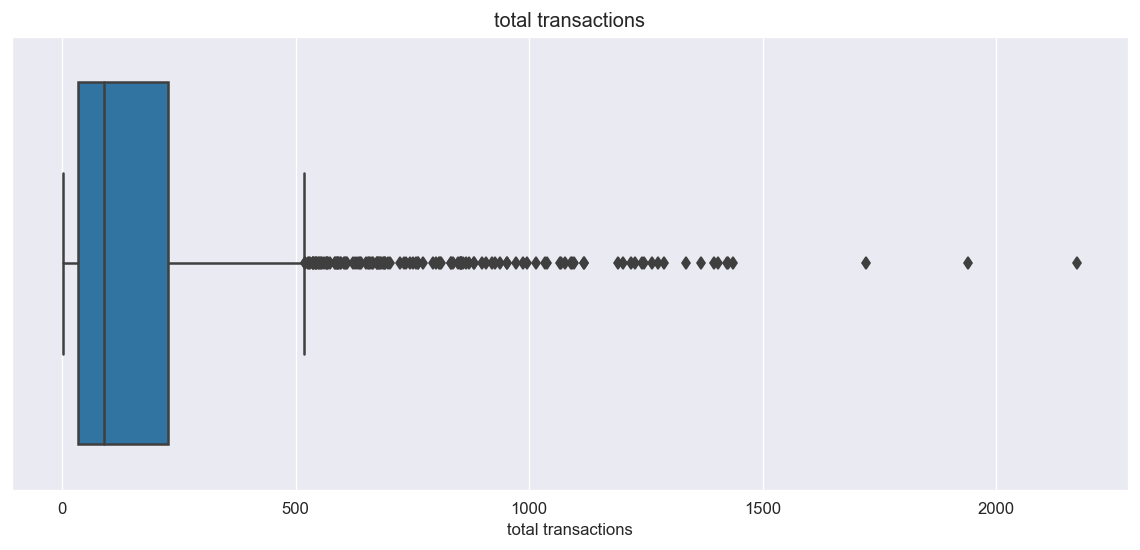

C:\Users\Gaming PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


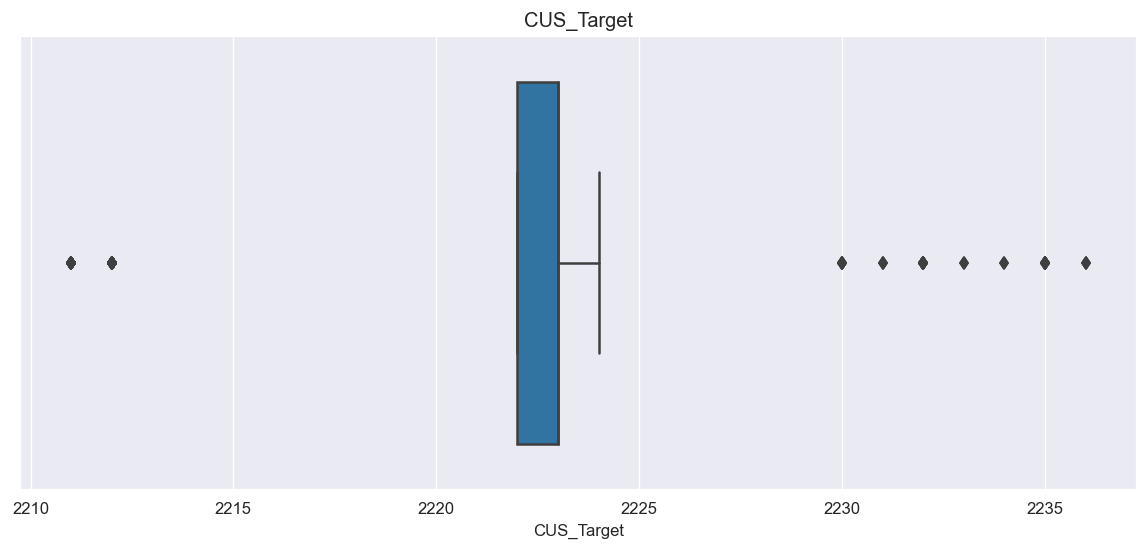

In [30]:
for col in data._get_numeric_data():
    plt.figure(figsize=(12,5))
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

In [31]:
data.head(5)

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1249 non-null   float64       
 4   CUS_Gender                          1249 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [33]:
data.drop(["CIF","CUS_DOB","CUS_Customer_Since","# total debit transactions for S1","# total debit transactions for S2","# total debit transactions for S3","total debit amount for S1","total debit amount for S2","total debit amount for S3","total credit amount for S1","total credit amount for S2","total credit amount for S3","# total credit transactions for S1","# total credit transactions for S2","# total credit transactions for S3","total transactions"],axis=1,inplace=True)

In [34]:
data.head(5)

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,4758311.63,887,5659653.33,65,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,139363.22,97,87000.00,10,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,37375.46,53,1020883.70,27,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,4000.00,1,76946.96,12,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,338470.29,60,442100.00,21,2223,LOW,ACTIVE


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        1249 non-null   int64  
 1   CUS_Month_Income           1249 non-null   float64
 2   CUS_Gender                 1249 non-null   object 
 3   CUS_Marital_Status         1249 non-null   object 
 4   YEARS_WITH_US              1249 non-null   int64  
 5   total debit amount         1249 non-null   float64
 6   total debit transactions   1249 non-null   int64  
 7   total credit amount        1249 non-null   float64
 8   total credit transactions  1249 non-null   int64  
 9   CUS_Target                 1249 non-null   int64  
 10  TAR_Desc                   1249 non-null   object 
 11  Status                     1249 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 117.2+ KB


In [36]:
status={'ACTIVE':0, 'CHURN':1}
data['Status']=data['Status'].map(status)

In [37]:
data["CUS_Gender"] = data["CUS_Gender"].replace({"MALE": 1, "FEMALE":0})

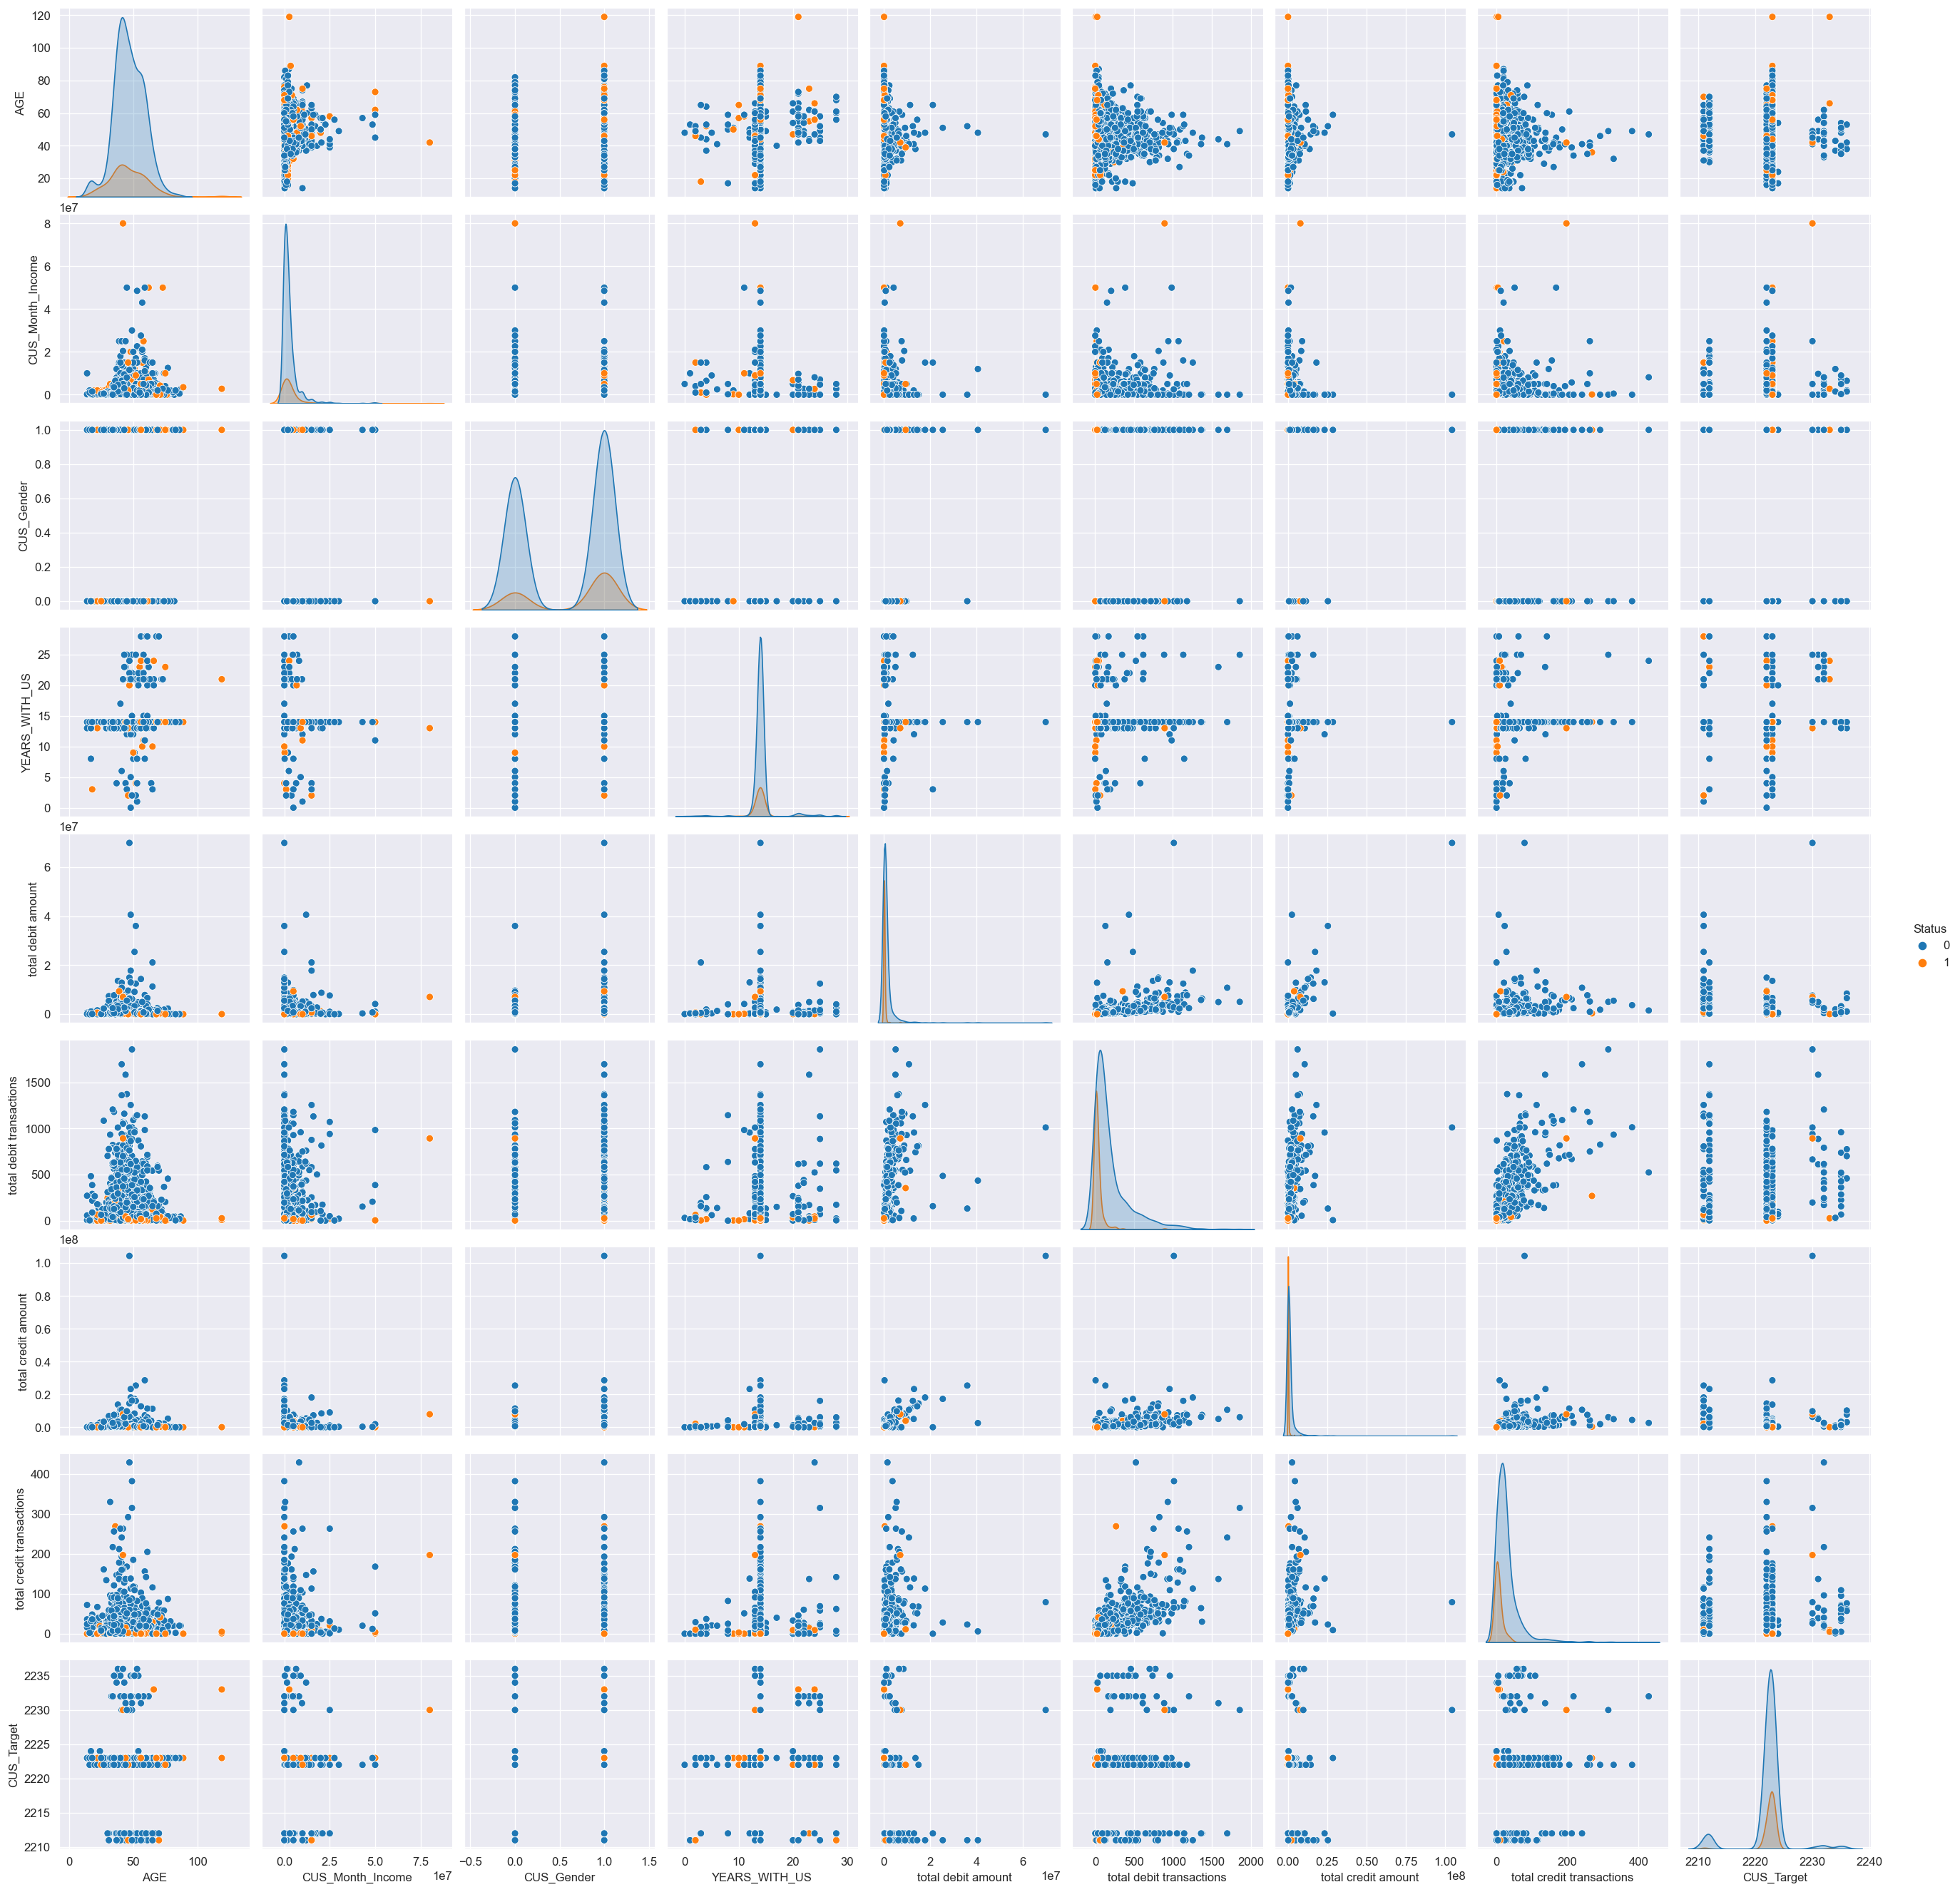

In [38]:
sns.pairplot(data=data,hue='Status')

In [39]:
data['Status'].value_counts()

0    1022
1     227
Name: Status, dtype: int64

In [40]:
from sklearn.utils import resample
df_0 = data[data["Status"]==0]
df_1= data[data["Status"]==1]
df_1_upsampled = resample(df_1,replace=True,n_samples=1022,random_state=20) 
data_us= pd.concat([df_0, df_1_upsampled], axis=0)
print(f"orginal:\n{data.Status.value_counts()}")
print(f"\nafter upsample: \n{data_us.Status.value_counts()}")

orginal:
0    1022
1     227
Name: Status, dtype: int64

after upsample: 
0    1022
1    1022
Name: Status, dtype: int64


In [41]:
data_us.Status.value_counts()

0    1022
1    1022
Name: Status, dtype: int64

In [42]:
data_us.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,1,MARRIED,25,4758311.63,887,5659653.33,65,2231,EXECUTIVE,0
1,46,1500000.00,0,SINGLE,14,139363.22,97,87000.00,10,2223,LOW,0
2,53,5000000.00,0,SINGLE,14,37375.46,53,1020883.70,27,2222,MIDLE,0
3,15,500.00,0,SINGLE,14,4000.00,1,76946.96,12,2223,LOW,0
4,48,9000000.00,0,SINGLE,5,338470.29,60,442100.00,21,2223,LOW,0


In [43]:
for i in data_us['TAR_Desc'].unique():
    data_us['TAR_Desc'+i]=data_us['TAR_Desc'].apply(lambda x: 1 if x==i else 0)

In [44]:
mar={'MARRIED':2, 'SINGLE':1, 'WIDOWED':5, 'DIVORCE':4, 'OTHER':6, 'PARTNER':3}
data_us['CUS_Marital_Status']=data['CUS_Marital_Status'].map(mar)

In [45]:
data_us.drop(['CUS_Marital_Status','TAR_Desc'],axis=1,inplace=True)

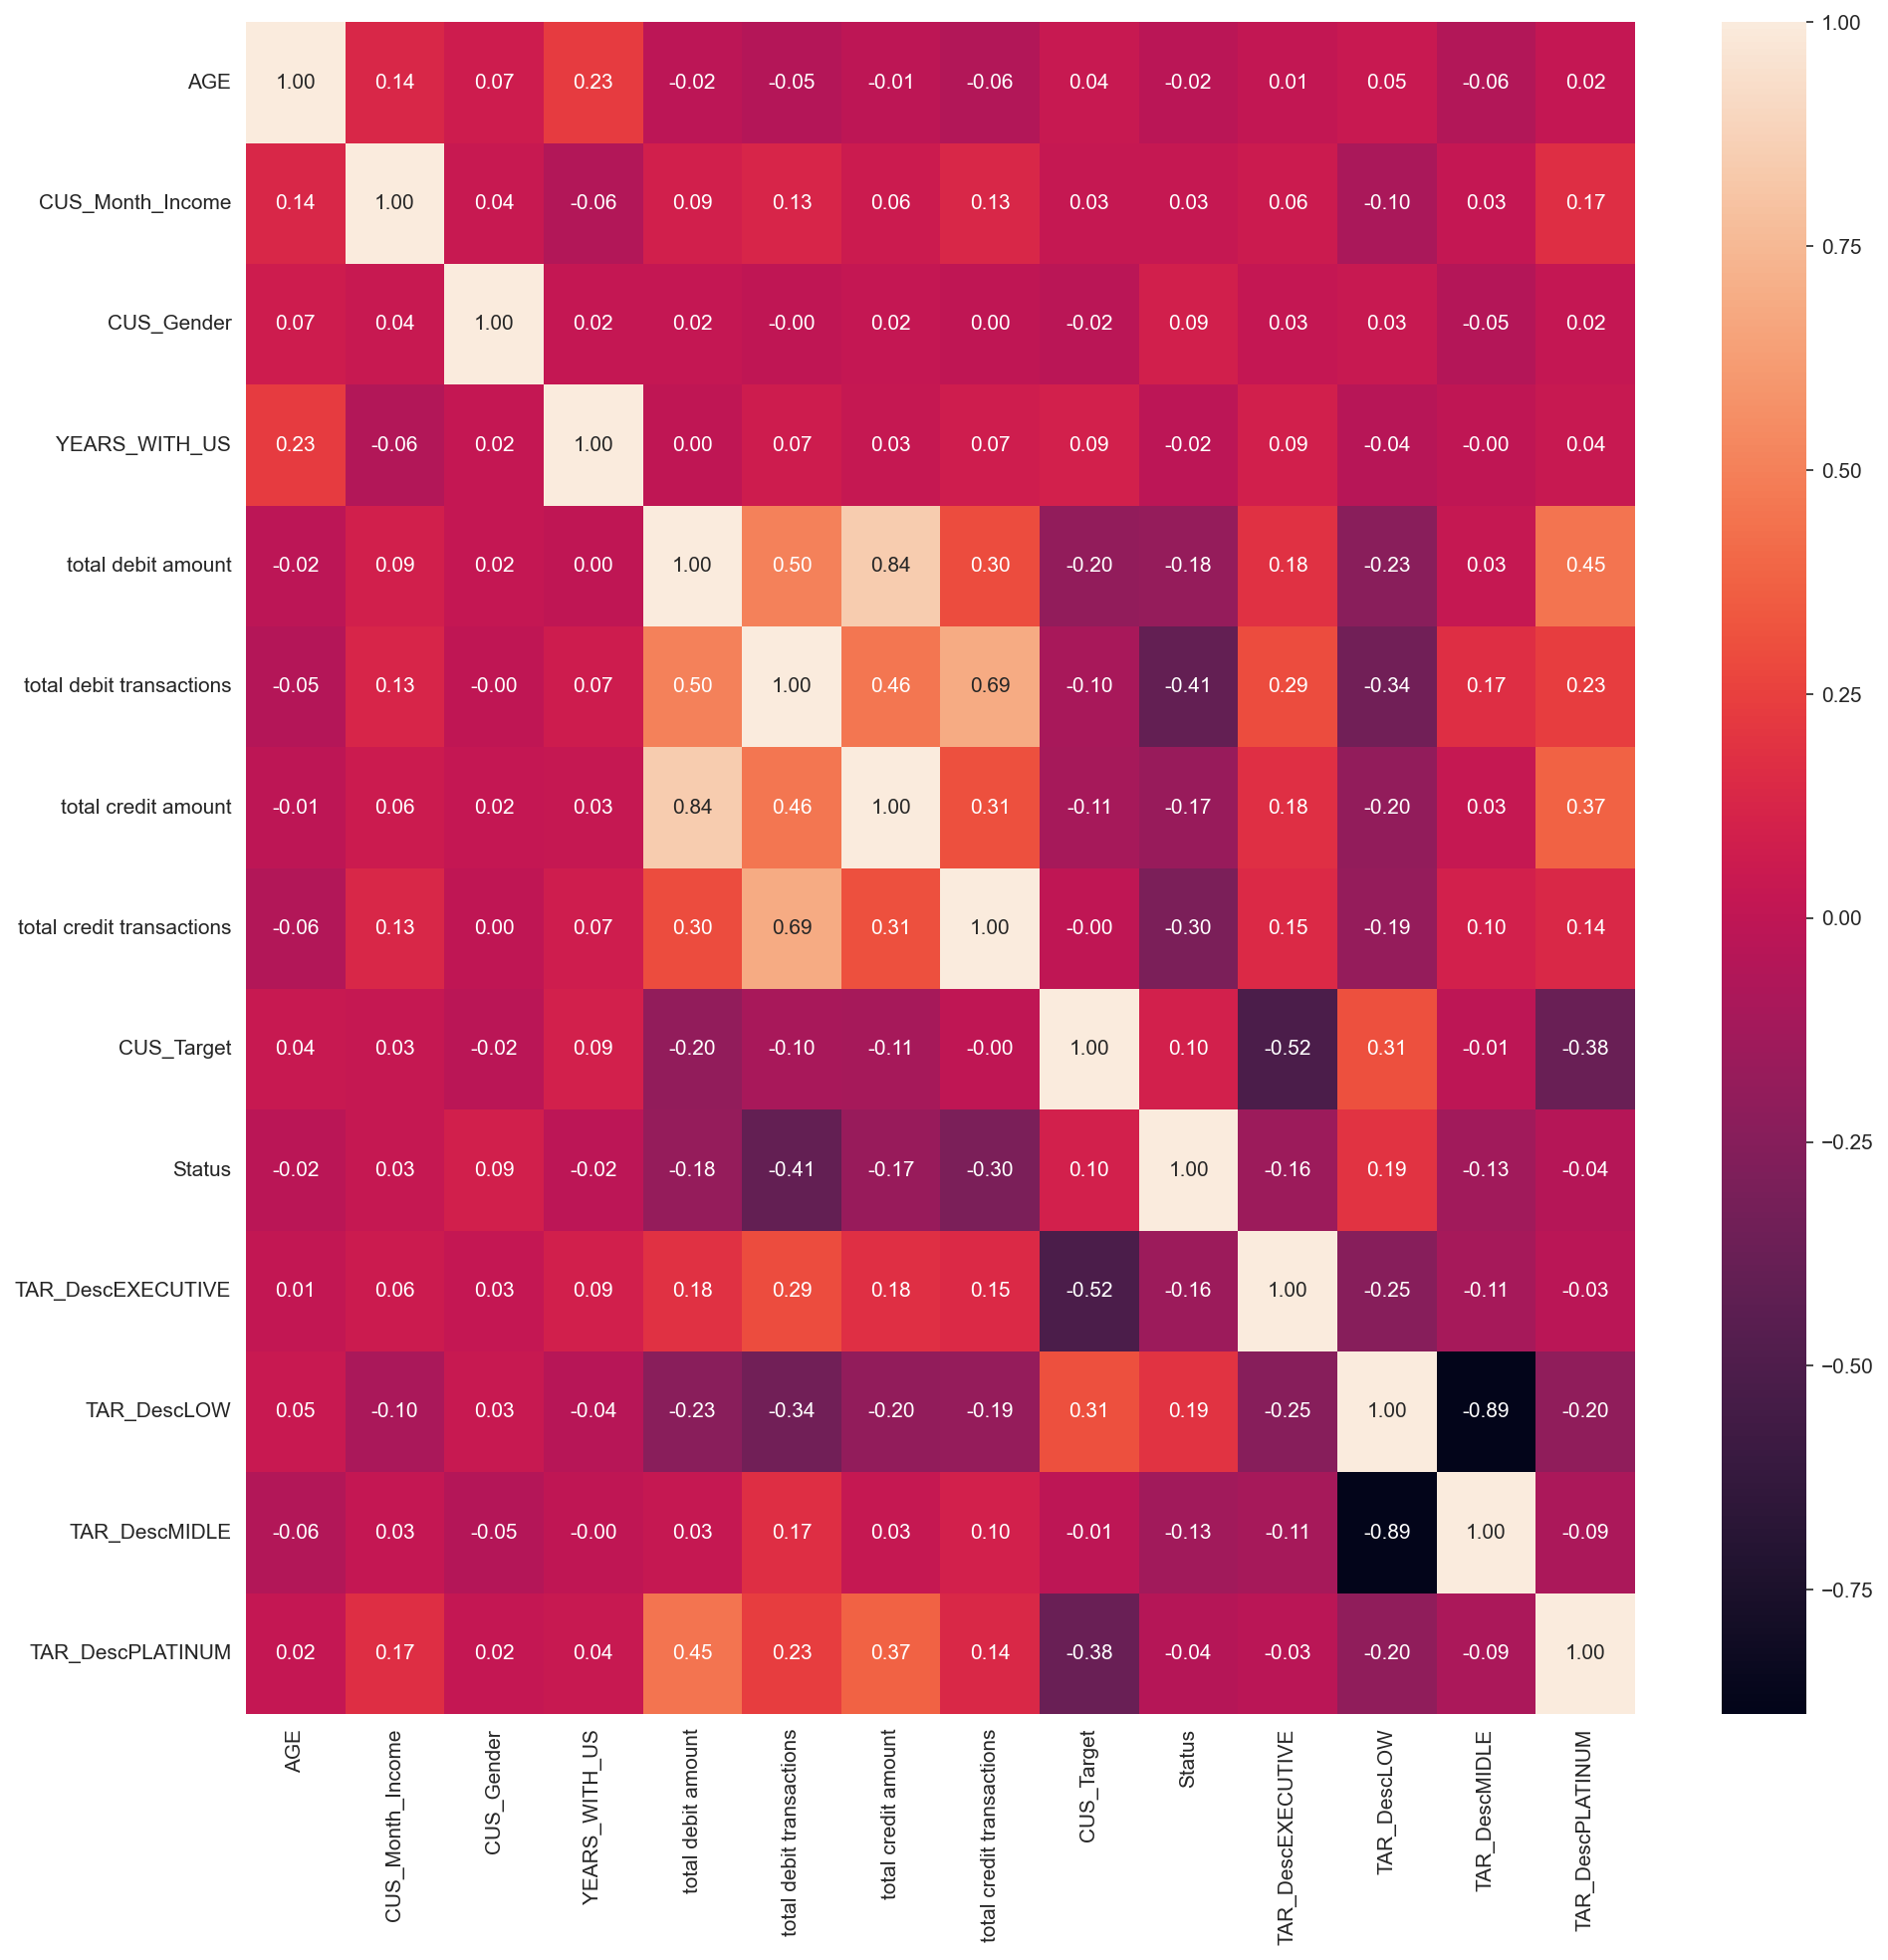

In [46]:
plt.figure(figsize=(15,15), dpi=150)
sns.heatmap(data_us.corr(), annot=True, fmt=".2f")
plt.show()

In [47]:
X=data_us.drop(['Status'],axis=1)

In [48]:
y=data_us['Status']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(1635, 13)
(409, 13)
(1635,)
(409,)


In [50]:
X_train.head(5)

,AGE,CUS_Month_Income,CUS_Gender,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_DescEXECUTIVE,TAR_DescLOW,TAR_DescMIDLE,TAR_DescPLATINUM
659,39,1800000.0,1,14,160399.48,50,135212.48,6,2223,0,1,0,0
689,52,4000000.0,0,2,11093.60,7,0.00,0,2223,0,1,0,0
802,37,750.0,0,14,5585.96,2,2486.31,1,2222,0,0,1,0
847,37,500.0,0,14,15063.60,7,0.00,0,2223,0,1,0,0
1215,42,5000000.0,0,13,1620384.63,372,402909.00,6,2222,0,0,1,0


In [51]:
from sklearn.ensemble import RandomForestClassifier
class_weight=dict({0:1,1:100})
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [52]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[193  24]
 [  2 190]]
0.9364303178484108
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       217
           1       0.89      0.99      0.94       192

    accuracy                           0.94       409
   macro avg       0.94      0.94      0.94       409
weighted avg       0.94      0.94      0.94       409



In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,[0,1,3,4,5,6,7,8,9]])
X_train.iloc[:,[0,1,3,4,5,6,7,8,9]] = scaler.transform(X_train.iloc[:,[0,1,3,4,5,6,7,8,9]])
X_test.iloc[:,[0,1,3,4,5,6,7,8,9]] = scaler.transform(X_test.iloc[:,[0,1,3,4,5,6,7,8,9]])

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [55]:
log_class=LogisticRegression()
grid={'C':[1,2,3,4,5,6,7,8,9,10,11,12],'max_iter':[100,200,120],'penalty':['l1','l2','elasticnet']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [56]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\Gaming PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gaming PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gaming PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Gaming PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    rais

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_iter': [100, 200, 120],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1_macro')

In [57]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[136  81]
 [ 16 176]]
0.7628361858190709
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       217
           1       0.68      0.92      0.78       192

    accuracy                           0.76       409
   macro avg       0.79      0.77      0.76       409
weighted avg       0.80      0.76      0.76       409



In [58]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

In [64]:
classifier.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
import pickle

In [60]:
file=open(r'C:\Users\Gaming PC\Desktop\bepec\churn/rf.model.pkl','wb')

In [61]:
pickle.dump(classifier,file)

In [62]:
model=open(r'C:\Users\Gaming PC\Desktop\bepec\churn/rf.model.pkl','rb')

In [63]:
forest=pickle.load(model)

In [65]:
forest.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,